In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_excel("C:/Users/82107/Desktop/deepLearning/week1/Raisin_Dataset.xlsx", index_col=None)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [5]:
# 컬렴명 확인
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [7]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'Class')

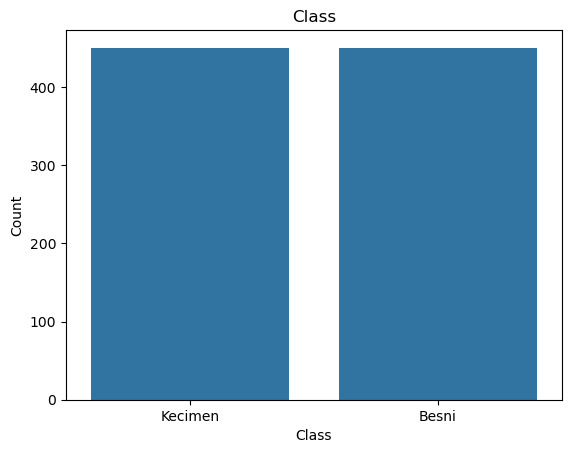

In [9]:
# Class
sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class")

In [11]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [13]:
X=df.drop('Class',axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [15]:
y=df['Class']
y.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

## 원-핫 인코딩
딥러닝 모델은 숫자 데이터만 처리할 수 있으므로,  각 범주를 이진 벡터로 변환시키는 원핫인코딩 사용

In [23]:
# 원-핫 인코딩 (결과가 False,True로 나올 경우가 있음)
y_encoded = pd.get_dummies(y).values

# 숫자형으로 변환
Y = y_encoded.astype(int)

In [25]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

## 딥러닝 입력을 위해 Numpy로 변환

In [28]:
X = X.values
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [30]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [45]:
from sklearn.model_selection import train_test_split
# 원-핫 인코딩을 거친 Y를 넣어야함
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0) 
print(X_train.shape)

(720, 7)


# 손실함수

* Binary Crossentropy

    이 손실 함수는 이진 분류 문제(binary classification)에 사용됩니다. 여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다. 보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용합니다. 이 함수는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 확률을 나타냅니다.
  
* Categorical Crossentropy

    다중 클래스 분류 문제(multi-class classification)에 사용됩니다. 모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다 소프트맥스 활성화 함수(softmax activation function)가 일반적으로 사용됩니다. 이 함수는 모든 클래스에 대해 확률 분포를 반환하여, 각 클래스에 속할 확률을 나타냅니다.

In [47]:
#Defining the model 
#Class가 0과 1로 구성되어 있으므로 Binary Crossentropy을 사용해야 한다. 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='relu')) # input_shape : feature 의 개수
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\82107\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236 (944.00 B)

 Trainable params: 236 (944.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 예측
y_pred = model.predict(X_test)

# y_test_class와 y_pred_class를 이진 클래스 레이블로 변환
y_test_class = y_test.flatten()  # y_test는 원래 이진 레이블이어야 함
y_pred_class = (y_pred > 0.5).astype(int).flatten() # 이진 분류에 맞게 변환

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5421 - loss: 1.8532 - val_accuracy: 0.6444 - val_loss: 4.1213
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5661 - loss: 3.1307 - val_accuracy: 0.5333 - val_loss: 4.1419
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4883 - loss: 2.5255 - val_accuracy: 0.4667 - val_loss: 7.7441
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5396 - loss: 2.8531 - val_accuracy: 0.5333 - val_loss: 4.8211
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4764 - loss: 3.5553 - val_accuracy: 0.5056 - val_loss: 4.0794
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5568 - loss: 1.7404 - val_accuracy: 0.6111 - val_loss: 2.9412
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5333 - loss: 2.3627 - val_accuracy: 0.5333 - val_loss: 6.7118
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5566 - loss: 3.1446 - val_accuracy: 0.7000 - val_loss:

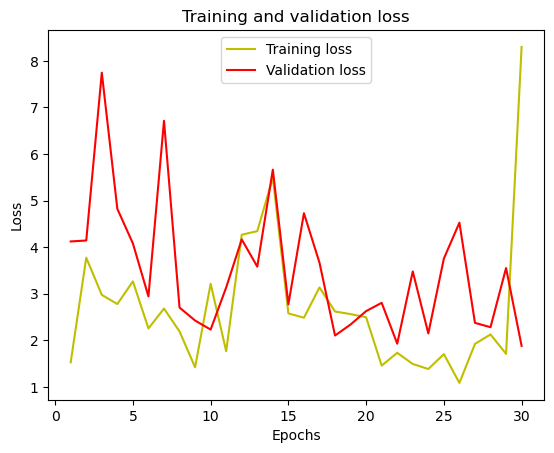

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

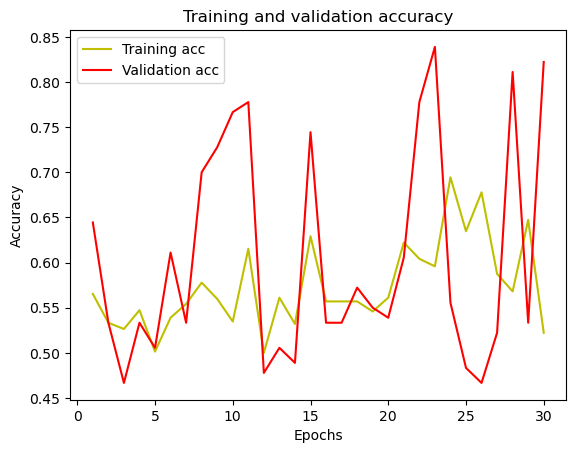

In [61]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.51      0.62       180
           1       0.63      0.85      0.73       180

    accuracy                           0.68       360
   macro avg       0.70      0.68      0.67       360
weighted avg       0.70      0.68      0.67       360

[[ 92  88]
 [ 27 153]]


In [65]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'테스트 손실: {loss}, 테스트 정확도: {accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 1.0734 
테스트 손실: 1.8787740468978882, 테스트 정확도: 0.8222222328186035
